## 3 - Transformacao dos Dados

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
d = pd.read_csv('DADOS_PROCESSADOS.csv')

In [148]:
d.set_index('Data', inplace=True)

## Vamos transformar os dados para obter os retornos dos preços r = (p2-p1)/p1 (percentual em variacao)

In [151]:
filtra_col = [c for c in d if c.startswith('Close') or c.startswith('BOVA11') or c.startswith('LastPrice')]

In [153]:
dc = d[filtra_col]

In [154]:
dr1 = dc.pct_change(1)
dr5 = dc.pct_change(5)
dr15 = dc.pct_change(15)

In [155]:
filtra_col_prob = [c for c in d if not c.startswith('Close') or c.startswith('BOVA11') or c.startswith('LastPrice')]

In [156]:
dp = d[filtra_col_prob]

In [157]:
dr1 = pd.concat([dp, dr1], axis=1)
dr5 = pd.concat([dp, dr1], axis =1)
dr15 = pd.concat([dp,dr15], axis =1)

In [158]:
dr1.dropna(inplace=True)
dr5.dropna(inplace=True)
dr15.dropna(inplace=True)

In [160]:
dr1 = dr1[~dr1.isin([np.inf, -np.inf])]
dr5 = dr5[~dr5.isin([np.inf, -np.inf])]
dr15 = dr15[~dr15.isin([np.inf, -np.inf])]

In [163]:
dr1['Prob_SUBIR_Corr'] = dr1['Prob_SUBIR_Corr'].replace(7777, np.nan)
dr5['Prob_SUBIR_Corr'] = dr5['Prob_SUBIR_Corr'].replace(7777, np.nan)
dr15['Prob_SUBIR_Corr'] = dr15['Prob_SUBIR_Corr'].replace(7777, np.nan)

In [164]:
dr1['Prob_SUBIR_Corr'] = dr1['Prob_SUBIR_Corr'].fillna(dr1['Prob_SUBIR_Corr'].mean())
dr5['Prob_SUBIR_Corr'] = dr5['Prob_SUBIR_Corr'].fillna(dr5['Prob_SUBIR_Corr'].mean())
dr15['Prob_SUBIR_Corr'] = dr15['Prob_SUBIR_Corr'].fillna(dr15['Prob_SUBIR_Corr'].mean())

In [165]:
def replace7777tomean(df, col_name):
    df[col_name] = df[col_name].replace(7777, np.nan)
    df[col_name] = df[col_name].fillna(df[col_name].mean())
    return df

In [166]:
dr1 = replace7777tomean(dr1, 'Prob_SUBIR_Pond_Corr_Pessos')

In [167]:
dr5 = replace7777tomean(dr5, 'Prob_SUBIR_Pond_Corr_Pessos')

In [168]:
dr15 = replace7777tomean(dr15, 'Prob_SUBIR_Pond_Corr_Pessos')

## Categorizando os dados

Probabilidade - varia de 0 a 1 - se menor que 0.5 a prob é baixa se maior que 0.5 é alta 

In [169]:
dr1['Prob_SUBIR'].describe()

count    108918.000000
mean          0.498581
std           0.151176
min           0.003000
25%           0.399000
50%           0.507000
75%           0.604000
max           0.965000
Name: Prob_SUBIR, dtype: float64

<Axes: >

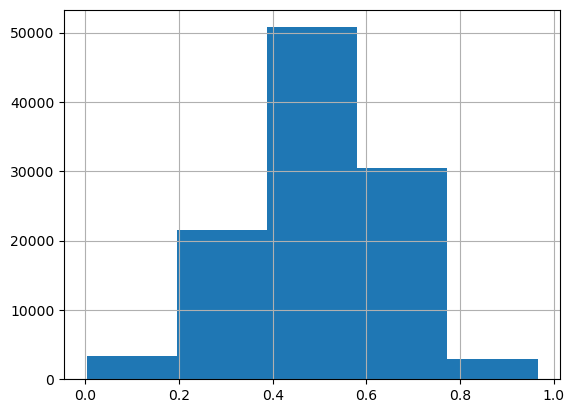

In [170]:
dr1['Prob_SUBIR'].hist(bins=5)

In [171]:
#obtendo valores dos bins do histograma
result, bins = pd.cut(dr1['Prob_SUBIR'], bins=5, retbins=True)

In [172]:
bins

array([0.002038, 0.1954  , 0.3878  , 0.5802  , 0.7726  , 0.965   ])

In [173]:
# de 0.002038 até 0.1954 = Muito baixo (MB), de 0.1954 até 0.3878 = Baixo (B), de 0.3878 até 0.5802 = Média(M)
# de 0.5802 até 0.7726 = Alta (A), de 0.7726 até 0.965 = Muito Alta (MA)

In [174]:
#nomeando as categorias 
dd = pd.cut(dr1['Prob_SUBIR'], bins=[0.002038, 0.1954  , 0.3878  , 0.5802  , 0.7726  , 0.965], labels=['MB','B','M','A','MA'])

In [175]:
dd.value_counts()

M     50768
A     30422
B     21473
MB     3396
MA     2859
Name: Prob_SUBIR, dtype: int64

In [176]:
dr1['Cat_Prob_SUBIR'] = dd

In [178]:
#criando categoria dos dias da semana para avaliar se há dias da semana que consigo ver alguma relação
dr1['DiaSemana'] = pd.DatetimeIndex(dr1.index).day_name()

In [184]:
dr1['DiaSemana'].replace('Wednesday', 'Quarta', inplace=True)
dr1['DiaSemana'].replace('Sunday', 'Domingo', inplace=True)
dr1['DiaSemana'].replace('Monday', 'Segunda', inplace=True)
dr1['DiaSemana'].replace('Tuesday', 'Terça', inplace=True)
dr1['DiaSemana'].replace('Saturday', 'Sabado', inplace=True)
dr1['DiaSemana'].replace('Friday', 'Sexta', inplace=True)
dr1['DiaSemana'].replace('Thursday', 'Quinta', inplace=True)

## Filtrando Dados

In [187]:
d2 = dr1.copy()

In [188]:
d2['Ind_C'].describe()

count    108918.000000
mean          7.664454
std           7.733233
min           0.000000
25%           2.000000
50%           5.000000
75%          11.000000
max          67.000000
Name: Ind_C, dtype: float64

In [189]:
filtro1 = d2['Ind_C'] > 30

In [190]:
filtro1.value_counts()

False    106846
True       2072
Name: Ind_C, dtype: int64

In [191]:
filtro2 = d2['Prob_SUBIR'] >= 0.8

In [192]:
filtro2.value_counts()

False    107324
True       1594
Name: Prob_SUBIR, dtype: int64

In [193]:
filtro3 = d2['Power_C'] >= 50

In [194]:
filtro3.value_counts()

False    77723
True     31195
Name: Power_C, dtype: int64

In [196]:
filtro4 = filtro1 & filtro2 & filtro3

In [198]:
filtro4.value_counts()

False    108117
True        801
dtype: int64

In [199]:
d2['DevoComprar'] = filtro4 #pelos critérios que escolhi agora sei no DF quais dias e ações devo comprar

In [211]:
d2.to_csv('DADOS_RET_CATEGORIAS.csv')